#### Tasks

#### Changes to Charts
- Do - Display images inline with associated link
- Do - have color of text where is in the original
- Do - Group related links perhaps order by id?
- Do - Histogram of Link Duration
- Do - Each table (Current, Departed, UnChanging) should have a rowcount
- Done - The time off by 5 hours, use local time
- Done - Remove links and instead have clickable links
- Done - More human-readable dates
- Done - Graph of links per day
- Done - Display duration
- Done - Each number stat should have a background graph

#### New Columns
- Do - Updated_dt
- Done - Site Name
- Done - Store human readable duration

#### New Charts
- Do - Word Cloud of line_content
- Do - Histogram of SiteNames - but show it changing over time
- Do - Last Scrape Time
- Do - Table of booleans and counts
- Do - Treemap of site_name_txt

#### New Jobs
- Do - Images
- Do - remove www. from site_name
- Do - site_name_txt is only populated for rows where id > 340
- Do - updated_dt via a trigger
- Done - Run python script as GitHub action



In [1]:
import pandas as pd
import datetime as datetime
import pprint
import os
import psycopg2
import requests
import boto3
import dotenv
from requests import get 
from bs4 import BeautifulSoup
from urllib.parse import urlparse, parse_qs, urlunparse
from bson.json_util import dumps
from IPython.display import display, Image
from IPython.display import HTML

# An example of getting current date

currDate = datetime.datetime.now()
 
print(currDate)

2023-06-20 20:43:37.791463


In [2]:
# Load the environment variables from the .env file
dotenv.load_dotenv()

scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)

POSTGRES_URL = os.environ.get('POSTGRES_URL')
# print(POSTGRES_URL)

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)


In [3]:
response = requests.get(scrape_url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

body_tag = soup.body

# print(body_tag)

In [4]:
img_tags = soup.find_all("img")
img_tags

[<img src="//eproof.drudgereport.com/pixel.gif" style="visibility: collapse;"/>,
 <img src="https://pbs.twimg.com/media/FzEzcm6aMAM5Eo4?format=png&amp;name=small" width="505"/>,
 <img border="0" height="85" src="/i/logo9.gif" width="610"/>,
 <img src="https://pbs.twimg.com/media/FzD99mZWIAAZH_m?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/FzD3Ci5WAAAa2aE?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/FzGpl5qaQAAuKaq?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FzE7LC5akAAdwdG?format=png&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FzEiDLPaYAY1Tm5?format=jpg&amp;name=small" width="200"/>,
 <img src="https://pbs.twimg.com/media/FzGjScsaUAI2aHM?format=jpg&amp;name=360x360" width="200"/>,
 <img src="https://pbs.twimg.com/media/FzD2ZHEXoAEnxIk?format=jpg&amp;name=360x360" width="200"/>]

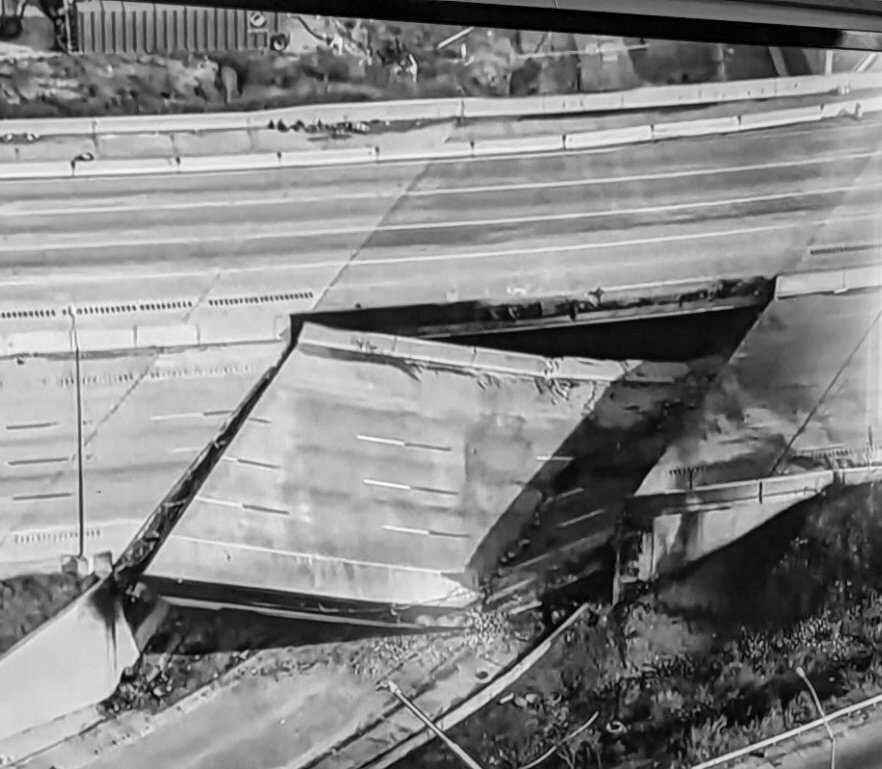

In [5]:
example_img = "https://pbs.twimg.com/media/FyV7PAEWwAADDKD.jpg"
# display(Image(example_img))
display(Image(example_img, width=200))


In [6]:
# webp file type

new_url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"
# display(Image(example_img))
from IPython.display import HTML, display

new_url_with_extension = new_url
print(new_url_with_extension)

# Generate HTML code to display the image with width set to 200 pixels
html_code = f'<img src="{new_url_with_extension}" width="200">'
print(html_code)

print("display the html image BEGIN")
display(HTML(html_code))
print("display the html image END")


https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG
<img src="https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG" width="200">
display the html image BEGIN


display the html image END


png
https://pbs.twimg.com/media/FzEzcm6aMAM5Eo4
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzEzcm6aMAM5Eo4', params='', query=None, fragment='')
{'format': ['png'], 'name': ['small']}
FzEzcm6aMAM5Eo4
https://pbs.twimg.com/media/FzEzcm6aMAM5Eo4.png


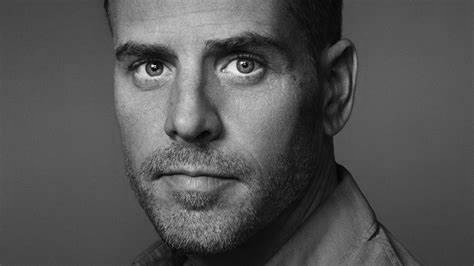

Content size of https://pbs.twimg.com/media/FzEzcm6aMAM5Eo4.png: 65274 bytes


jpg
https://pbs.twimg.com/media/FzD99mZWIAAZH_m
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzD99mZWIAAZH_m', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
FzD99mZWIAAZH_m
https://pbs.twimg.com/media/FzD99mZWIAAZH_m.jpg


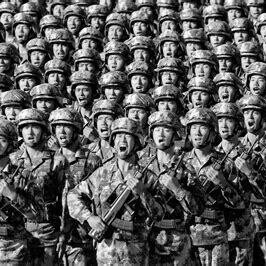

Content size of https://pbs.twimg.com/media/FzD99mZWIAAZH_m.jpg: 29787 bytes


jpg
https://pbs.twimg.com/media/FzD3Ci5WAAAa2aE
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzD3Ci5WAAAa2aE', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
FzD3Ci5WAAAa2aE
https://pbs.twimg.com/media/FzD3Ci5WAAAa2aE.jpg


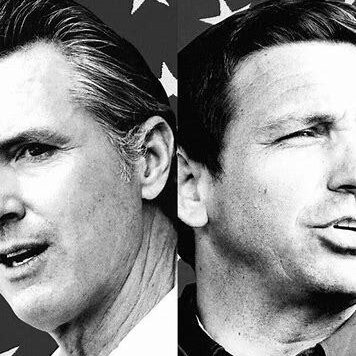

Content size of https://pbs.twimg.com/media/FzD3Ci5WAAAa2aE.jpg: 38228 bytes


jpg
https://pbs.twimg.com/media/FzGpl5qaQAAuKaq
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzGpl5qaQAAuKaq', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FzGpl5qaQAAuKaq
https://pbs.twimg.com/media/FzGpl5qaQAAuKaq.jpg


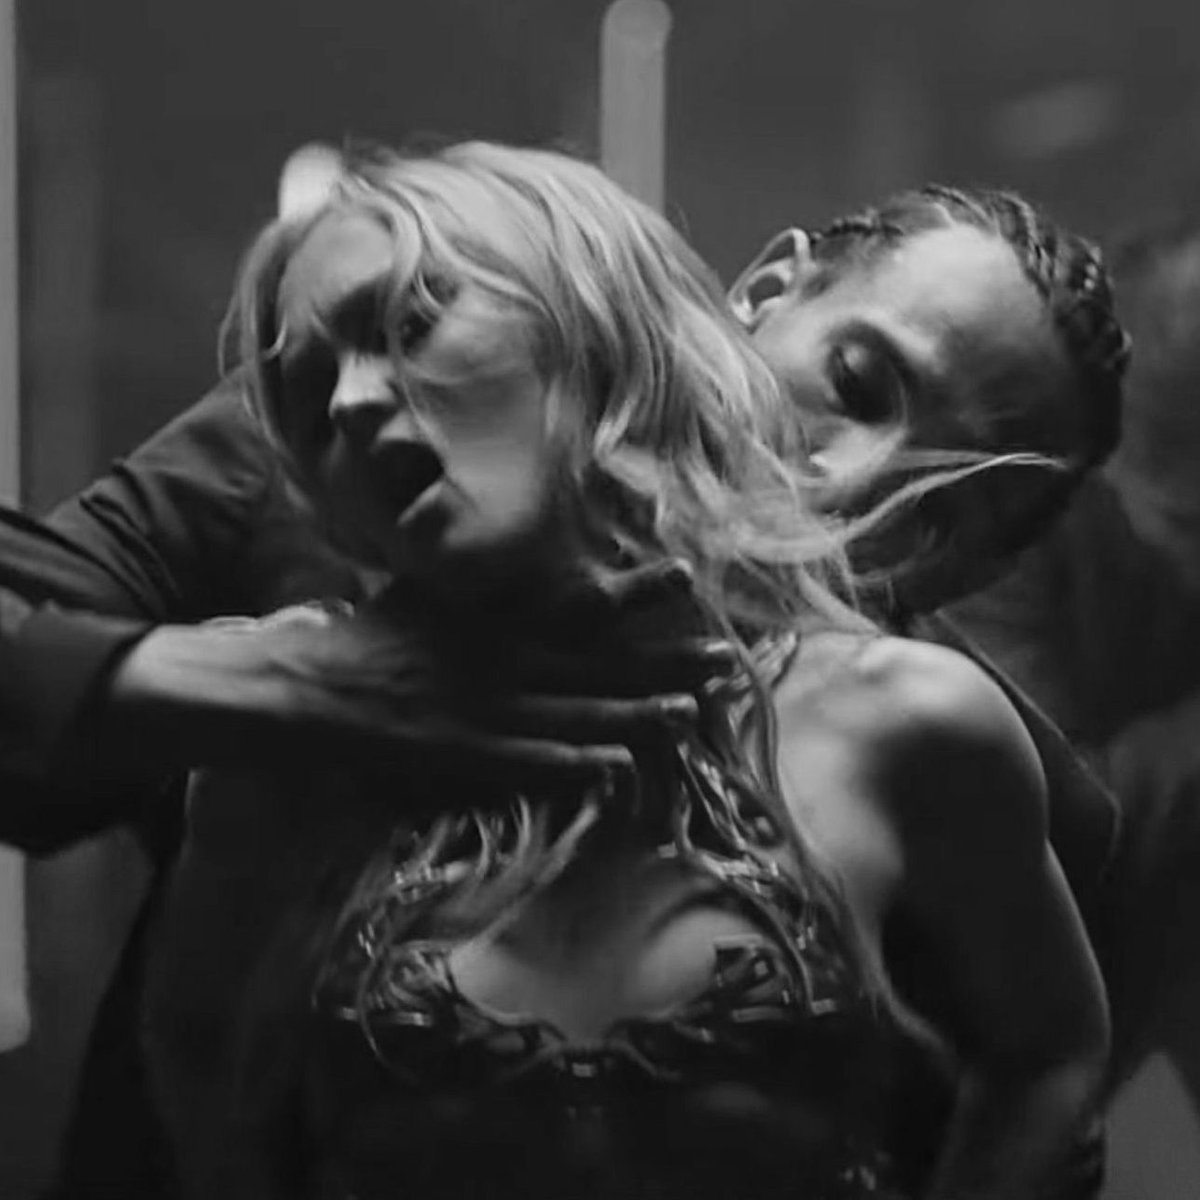

Content size of https://pbs.twimg.com/media/FzGpl5qaQAAuKaq.jpg: 99125 bytes


png
https://pbs.twimg.com/media/FzE7LC5akAAdwdG
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzE7LC5akAAdwdG', params='', query=None, fragment='')
{'format': ['png'], 'name': ['small']}
FzE7LC5akAAdwdG
https://pbs.twimg.com/media/FzE7LC5akAAdwdG.png


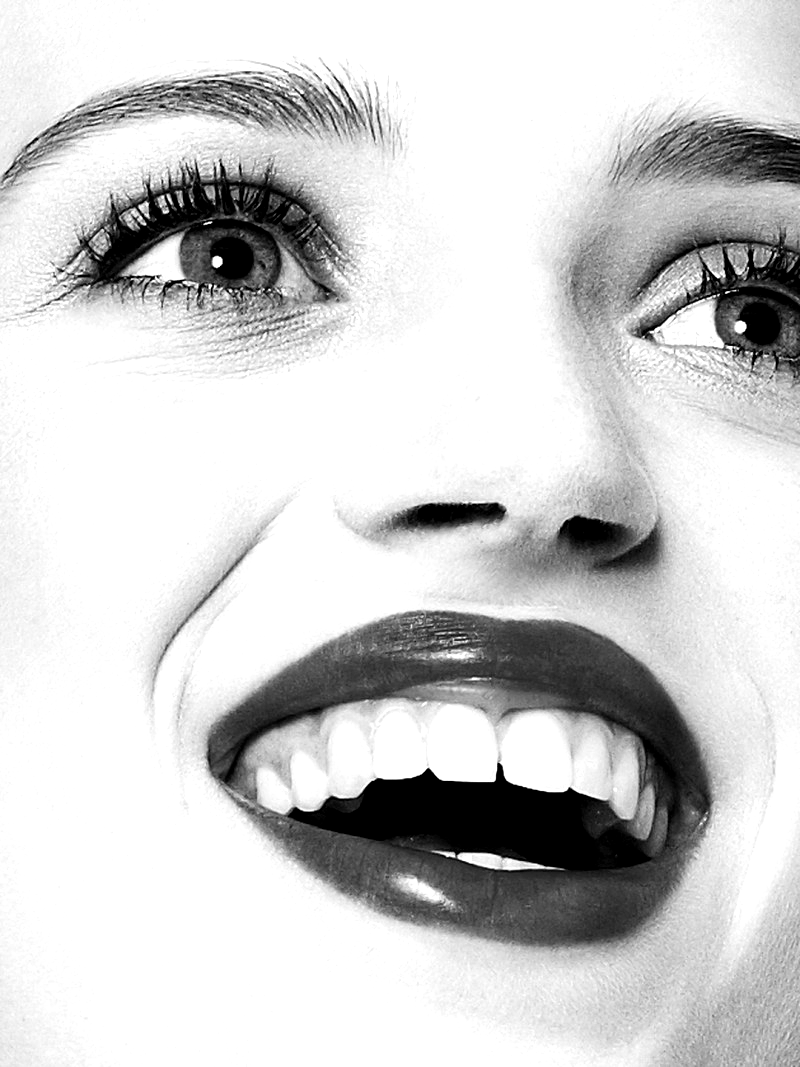

Content size of https://pbs.twimg.com/media/FzE7LC5akAAdwdG.png: 407139 bytes


jpg
https://pbs.twimg.com/media/FzEiDLPaYAY1Tm5
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzEiDLPaYAY1Tm5', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['small']}
FzEiDLPaYAY1Tm5
https://pbs.twimg.com/media/FzEiDLPaYAY1Tm5.jpg


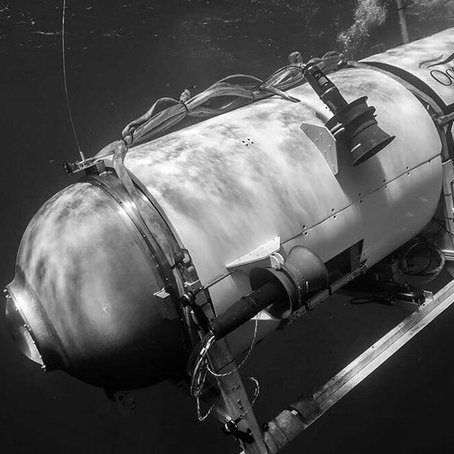

Content size of https://pbs.twimg.com/media/FzEiDLPaYAY1Tm5.jpg: 39066 bytes


jpg
https://pbs.twimg.com/media/FzGjScsaUAI2aHM
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzGjScsaUAI2aHM', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
FzGjScsaUAI2aHM
https://pbs.twimg.com/media/FzGjScsaUAI2aHM.jpg


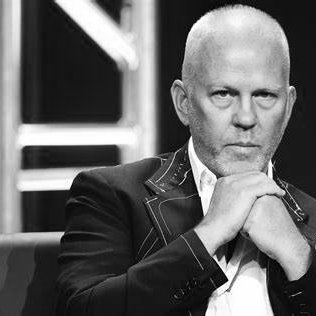

Content size of https://pbs.twimg.com/media/FzGjScsaUAI2aHM.jpg: 18702 bytes


jpg
https://pbs.twimg.com/media/FzD2ZHEXoAEnxIk
ParseResult(scheme='https', netloc='pbs.twimg.com', path='/media/FzD2ZHEXoAEnxIk', params='', query=None, fragment='')
{'format': ['jpg'], 'name': ['360x360']}
FzD2ZHEXoAEnxIk
https://pbs.twimg.com/media/FzD2ZHEXoAEnxIk.jpg


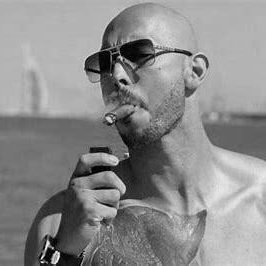

Content size of https://pbs.twimg.com/media/FzD2ZHEXoAEnxIk.jpg: 13404 bytes




In [7]:
# import os
# from urllib.parse import urlparse, parse_qs, urlunparse

for img in img_tags:
    src = img.get("src")
    if "https" in src:
        parsed_url = urlparse(src)
        query_params = parse_qs(parsed_url.query)
        extension = query_params.get('format', [''])[0]
        filename = os.path.basename(parsed_url.path)
        filename_with_extension = f"{filename}.{extension}"
        parsed_url = parsed_url._replace(query=None)
        new_url = urlunparse(parsed_url)

        print(extension)
        print(new_url)
        print(parsed_url)
        print(query_params)
        print(filename)
        # print(new_url_with_extension)

        if len(extension) > 0:
            # print("The extension is non-empty")
            new_url_with_extension = f"{new_url}.{extension}"
            print(new_url_with_extension)
            display(Image(new_url_with_extension, width=200))
            # file_size = os.path.getsize(new_url_with_extension)
            # print(file_size)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
        else:
            print("The extension is empty, omitting extension.")
            new_url_with_extension = new_url
            print(new_url_with_extension)
            # Send a HEAD request to retrieve the response headers
            response = requests.head(new_url_with_extension)
            # Get the content size from the response headers
            content_size = int(response.headers.get("Content-Length", 0))
            # Print the content size
            print(f"Content size of {new_url_with_extension}: {content_size} bytes")
            # Generate HTML code to display the image
            html_code = f'<img src="{new_url_with_extension}" width="200">'
            print(html_code)
            print("display the html image BEGIN")
            display(HTML(html_code))
            print("display the html image END")
    

        # display(Image(new_url_with_extension, width=200))
        print("\n")

        # print(extension)
        # print(new_url)
        # print(parsed_url)
        # print(query_params)
        # print(filename)
        # print(filename_with_extension)
        # display(Image(new_url + filename_with_extension.split('&')[0], width=200))


In [8]:
# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Iterate over the lines and print line number, content, and type (link or image)
for i, line in enumerate(lines, start=1):
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")

    if line.find("img"):
        line_type = "Image"

    print(f"Line {i}: {line_content} [{line_type}]")
    print(f"URL: {line_url}")

Line 1: TRUMP TRIAL DATE SET -- DAYS BEFORE FIRST REPUBLICAN DEBATE... [Link]
URL: https://www.msn.com/en-us/news/other/judge-cannon-sets-trump-trial-for-august-but-it-s-not-likely-to-stick/ar-AA1cNxIZ
Line 2: JUDGE MOVES CASE OUT OF MIAMI... [Link]
URL: https://www.yahoo.com/news/donald-trumps-federal-trial-place-152144349.html
Line 3: POLL: Support softens post-indictment... [Link]
URL: https://www.cnn.com/2023/06/20/politics/cnn-poll-trump-indictment-republicans-2024/index.html
Line 4: Admitted to Obstruction on FOX, Declares Christie... [Link]
URL: https://www.mediaite.com/tv/trump-admitted-to-obstruction-of-justice-on-fox-news-argues-chris-christie/
Line 5: BARR:  Bringing 'Calamity on Himself and Country'... [Link]
URL: https://www.mediaite.com/politics/bill-barr-savages-incorrigible-trump-for-victim-complex-and-bringing-calamity-on-himself-and-the-country/
Line 6: Team Suspects Meadows Is 'Rat'... [Link]
URL: https://www.msn.com/en-us/news/politics/team-trump-suspects-his-former

In [14]:
import requests
from bs4 import BeautifulSoup
import psycopg2
from datetime import datetime

# Make a request to the webpage
scrape_url = os.getenv('SCRAPE_URL')
# print(scrape_url)
url = scrape_url  
response = requests.get(url)

# Create BeautifulSoup object
soup = BeautifulSoup(response.text, "html.parser")

# Find all the lines (within <a> tags) in the webpage
lines = soup.find_all("a")

# Connect to the PostgreSQL database
# conn = psycopg2.connect(
#     host="your_host",
#     database="your_database",
#     user="your_user",
#     password="your_password"
# )

FINAL_POSTGRES_URL = os.environ.get('FINAL_POSTGRES_URL')
# print(POSTGRES_URL)

# Add 'sslmode=require' to the connection URL
# POSTGRES_URL += "?sslmode=require"

# print(POSTGRES_URL)

# Insert keyboard interrupt to stop the execution
# raise KeyboardInterrupt

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

# Initialize line_num as an integer
line_num = 0

current_datetime = datetime.now()
print(current_datetime)

# Iterate over the lines and insert/update each line into the database
for line in lines:
    line_content = line.get_text()
    line_type = "Link"
    line_url = line.get("href")
    site_name_txt = ""

    # Increment line_num for each line
    line_num += 1

    if line.find("img"):
        line_type = "Image"
        line_content = line.get("src")
        print(f"Line {line_num}: Image found {line_content}")

    if bool(line_content):
        # domain name not available for images
        site_name_txt = urlparse(line_url).netloc

        # Upsert the line into the database
        query = """
            INSERT INTO scraper_history (line_content, line_type, line_num, line_url, site_name_txt, first_dt, latest_dt)
            VALUES (%s, %s, %s, %s, %s, %s, %s)
            ON CONFLICT (line_content, line_url) DO UPDATE
            SET latest_dt = EXCLUDED.latest_dt
            WHERE scraper_history.line_content = EXCLUDED.line_content
            AND scraper_history.line_url = EXCLUDED.line_url
        """
        data = (line_content, line_type, line_num, line_url, site_name_txt, current_datetime, current_datetime)
        cursor.execute(query, data)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()

current_datetime = datetime.now()
print(current_datetime)



2023-06-20 21:11:31.108112
Line 12: Image found None
2023-06-20 21:11:37.449579


### Update departed boolean

In [15]:
### Update departed boolean
import psycopg2

current_datetime = datetime.now()
print(current_datetime)

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

query = """
update scraper_history
set departed = true,
    perm_link = false
where id in (
select id
from  scraper_history
where latest_dt < (
  select max(latest_dt) 
  from scraper_history
  ))
"""
cursor.execute(query)

# where departed = false

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()

current_datetime = datetime.now()
print(current_datetime)



2023-06-20 21:11:37.468270
2023-06-20 21:11:37.784801


### Update perm_link boolean

In [16]:
### Update perm_link boolean
import psycopg2

current_datetime = datetime.now()
print(current_datetime)

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

query = """
update  scraper_history
set     perm_link = TRUE
where id in (
select id
from  scraper_history
where departed = FALSE
and   perm_link = FALSE
and   latest_dt = (
 select max(latest_dt) 
 from scraper_history
 )
and   first_dt = (
 select min(first_dt) 
 from scraper_history
 ))
"""
cursor.execute(query)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()

current_datetime = datetime.now()
print(current_datetime)


2023-06-20 21:11:37.807000
2023-06-20 21:11:38.115543


### Update duration_txt, duration_secs

In [17]:
### Update duration_secs
import psycopg2

current_datetime = datetime.now()
print(current_datetime)

conn = psycopg2.connect(POSTGRES_URL)

cursor = conn.cursor()

query = """
UPDATE scraper_history
SET duration_secs = EXTRACT(EPOCH FROM (latest_dt - first_dt)),
    duration_txt = TO_CHAR(latest_dt - first_dt, 'DD "day(s), " HH24:MI:SS')
"""

# UPDATE scraper_history
# SET duration_secs = EXTRACT(EPOCH FROM (latest_dt - first_dt))


cursor.execute(query)

# Commit the changes and close the database connection
conn.commit()
cursor.close()
conn.close()

current_datetime = datetime.now()
print(current_datetime)


2023-06-20 21:11:38.126144
2023-06-20 21:11:38.414783


### Store the image in an S3 bucket

In [18]:
# import requests
# import boto3

# URL of the webp image
url = "https://th.bing.com/th/id/OIP.nRbbi2YXG-QUVWIcF34ElAHaLG"

# Send a GET request to the image URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Access the image content
    image_content = response.content

    # Store the image content in an S3 bucket
    s3 = boto3.client('s3')
    bucket_name = 'your-bucket-name'
    key = 'image.webp'  # Provide a desired key (filename) with the .webp extension
    s3.put_object(Body=image_content, Bucket=bucket_name, Key=key)

    print("Image successfully stored in S3.")

else:
    print("Failed to retrieve the image:", response.status_code)


NoCredentialsError: Unable to locate credentials